In [6]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

In [7]:
!pwd

/home/anneconstance/code/migasar/kaggle-wagon552-shopee/notebooks


In [77]:
df = pd.read_csv('../raw_data/train.csv')
df.size

171250

In [9]:
df.head()

,posting_id,image,image_phash,title,label_group
0,train_129225211,0000a68812bc7e98c42888dfb1c07da0.jpg,94974f937d4c2433,Paper Bag Victoria Secret,249114794
1,train_3386243561,00039780dfc94d01db8676fe789ecd05.jpg,af3f9460c2838f0f,"Double Tape 3M VHB 12 mm x 4,5 m ORIGINAL / DO...",2937985045
2,train_2288590299,000a190fdd715a2a36faed16e2c65df7.jpg,b94cb00ed3e50f78,Maling TTS Canned Pork Luncheon Meat 397 gr,2395904891
3,train_2406599165,00117e4fc239b1b641ff08340b429633.jpg,8514fc58eafea283,Daster Batik Lengan pendek - Motif Acak / Camp...,4093212188
4,train_3369186413,00136d1cf4edede0203f32f05f660588.jpg,a6f319f924ad708c,Nescafe \xc3\x89clair Latte 220ml,3648931069


In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34250 entries, 0 to 34249
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   posting_id   34250 non-null  object
 1   image        34250 non-null  object
 2   image_phash  34250 non-null  object
 3   title        34250 non-null  object
 4   label_group  34250 non-null  int64 
dtypes: int64(1), object(4)
memory usage: 1.3+ MB


In [6]:
df.describe()

,label_group
count,3.425000e+04
mean,2.128611e+09
std,1.234630e+09
min,2.580470e+05
25%,1.050720e+09
50%,2.120410e+09
75%,3.187910e+09
max,4.294197e+09


In [121]:
df['image'].shape

(34250,)

In [17]:
df.nunique()

posting_id     34250
image          32412
image_phash    28735
title          33117
label_group    11014
dtype: int64

In [18]:
df.isna().sum()

posting_id     0
image          0
image_phash    0
title          0
label_group    0
dtype: int64

In [19]:
pip install scikit-image

Note: you may need to restart the kernel to use updated packages.


In [17]:
from skimage import io
import os

In [80]:
def trans_img(file_name):
    filename = os.path.abspath(os.path.join('../raw_data/train_images', file_name))
    return io.imread(filename)

In [81]:
img_1 = trans_img('00039780dfc94d01db8676fe789ecd05.jpg')

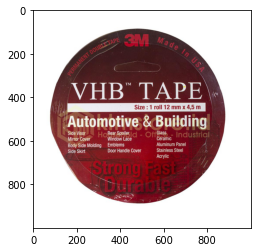

In [82]:
plt.imshow(img_1)

In [40]:
df['title'][3]

'Daster Batik Lengan pendek - Motif Acak / Campur - Leher Kancing (DPT001-00) Batik karakter Alhadi'

# Image preprocessing

## Resizing

We want to reshape the images in smaller size (state-of-the-art networks are trained on (224,224,3) images / tensors)

In [83]:
from skimage import io
import os

def get_img_size():
    images = [image for image in df['image']]
    img_shape = []
    for image in images[11:76]:
        img = trans_img(image)
        x = img.shape
        img_shape.append(x)
        size_img = pd.DataFrame(img_shape)
    return size_img

In [84]:
img_size_df = get_img_size()
img_size_df.sort_values(by=0, ascending=False)

,0,1,2
32,1024,1024,3
40,1024,1024,3
27,1024,1024,3
28,1024,1024,3
15,1024,1024,3
...,...,...,...
38,640,640,3
10,604,604,3
8,595,595,3
2,449,449,3


In [20]:
max(img_size_df[1]), min(img_size_df[1])

(5000, 100)

In [26]:
sizes_set = set(img_size_df[0])
def sizes_ratio():
    for size in sizes_set:
        return img_size_df[0].value_counts()/len(df['image'])*100

In [27]:
len(sizes_set)

751

In [28]:
x = sizes_ratio()
x.sort_values(ascending=False)


640     35.921168
1024    18.639416
800     11.433577
700      8.569343
1000     4.502190
          ...    
290      0.002920
130      0.002920
887      0.002920
865      0.002920
368      0.002920
Name: 0, Length: 751, dtype: float64

In [64]:
def get_unsquarred() :
    records = img_size_df.to_records(index=False)
    list_sizes = list(records)
    print(list_sizes)
    unsquarred =[]
    for x in list_sizes:
        if x[0]!=x[1]:
            unsquarred.append(x[0])
    return f"Ratio of unsquarred images : {round(len(unsquarred)/len(df['image']), 3)*100} %"

In [65]:
get_unsquarred()

[(640, 640, 3), (640, 640, 3), (640, 640, 3), (640, 640, 3), (640, 640, 3)]


'Ratio of unsquarred images : 0.0 %'

Turning images into arrays of size (224, 224, 3) 

In [103]:
def drop_unsquarred():
    images = [image for image in df['image']]
    for image in images[0:5]:
        img = trans_img(image)
#     print(img)
        reshaped_img = img.reshape(img, 100*100*3)
    print(img)
    # Get indexes of unsquarred rows
#     indexNames = df[df['image_length'] != df['image_height']].index
#     # Delete these row indexes from dataFrame
#     df.drop(indexNames , inplace=True)
#     print(df.size)

In [104]:
drop_unsquarred()

TypeError: only integer scalar arrays can be converted to a scalar index

In [63]:
def drop_unsquarred():
    # Get indexes of unsquarred rows
    indexNames = df[df['image'][0] == df['image'][1]].index
    # Delete these row indexes from dataFrame
    df.drop(indexNames , inplace=True)
    return df

KeyError: False

In [45]:
from skimage.transform import resize
from skimage import io
import os

def resize_images():
    images = [image for image in df['image']]
    img_shape = []
    for image in images[0:10]:
        image_path =  f'{image}'
        filename = os.path.abspath(os.path.join('../raw_data/train_images', image_path))
        img = io.imread(filename)
        x = img.shape
        img_shape.append(x)
        size_img = pd.DataFrame(img_shape)
        for img in size_img.loc[:,[0, 1]]:
            image_resized = resize(img, (img[0] // 5000 * 100, img[1] // 5000 * 100), anti_aliasing=True)
    return df['image']

In [46]:
resize_images()

TypeError: 'int' object is not subscriptable

## Intensity normalization

Neural networks converge faster if the inputs are somewhat normalized. Therefore we want to transform the image pixels with values between 0 and 255 (for each color) into values between -1 and 1, thanks to Keras libraries (or just by dividing all the data by 255)

## Data augmentation

Creation of additionnal data to explore : 
- Mirror
- Crop
- rotations
- slight transformation of the colors
- change of the textures
- "photoshop effects": blur, halo, ...
- deformations
- ...

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Reshape

model = Sequential()
model.add(Reshape((5*5*1,), input_shape=(5,5,1)))  # This flattens the (5, 5, 1) image to a vector of size 25
model.add(Dense(100, activation='relu'))
model.add(Dense(10, activation='softmax')) 

# Preprocessing on titles 

In [89]:
pip install nltk

Note: you may need to restart the kernel to use updated packages.


- Lowercase
- remove numbers
- remove punctuation
- remove stop words
- select important words with stemmer

In [127]:
import string 
from nltk.corpus import stopwords 
from nltk.tokenize import word_tokenize
from nltk.stem.porter import PorterStemmer


def text_preproc(title):
    titles = []
    title = str(title).lower()
    title = ''.join(word for word in title if not word.isdigit())
    string.punctuation
    for punctuation in string.punctuation:
        title = str(title).replace(punctuation, '')
        stop_words = set(stopwords.words('english')) 
        word_tokens = word_tokenize(title) 
        title = [w for w in word_tokens if not w in stop_words]
        stemmer = PorterStemmer()
        stemmed = [stemmer.stem(word) for word in title]
        titles.append(title)
    return titles

In [ ]:
title = df['title']
text_preproc(title)